## Data Pre Processing 

In [153]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### DataFrame Creation

In [154]:
#read data from data set 
data1 = pd.read_csv("DataSet/adult.data",header = None)
data2 = pd.read_csv("DataSet/adult.test", header=None, skiprows=1)
data = pd.concat([data1,data2])


In [156]:
#adding columns name from given that in adult.names file 
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
#preview first five data rows from data set
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [157]:
data.shape

(48842, 15)

In [222]:
# Saving the dataframe as a csv file for future references.
data.to_csv('dataset/adult_dataset.csv', index_label= False)

### Data Cleaning Process

In [159]:
#checking for duplicates in dataset
duplicates = data[data.duplicated()]
duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


As you can see there are some duplicate rows. So lets remove that rows

In [160]:
#remove duplicates data from dataset
data = data.drop_duplicates()
print(data[data.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


As you can see now there is no duplicate values in this dataset

### Structural Errors

In [161]:
#checking for unique values in the dataset
unique_values = data.nunique()
unique_values

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [162]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishi

As you can see several question marks appear as unique values in the 'work class', 'occupation', and 'native-country' columns, which seem doesn't have a meaning. Let's remove them.

In [163]:
#create a copy and save it to data because we can replace values in direct dataset
data = data.copy()


In [164]:
# Checking the values in those columns and replacing ' ?' with pd.NA
data.replace(' ?', pd.NA, inplace=True)

In [165]:
#Check again if any ' ?' values remain in the dataset
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 <NA> ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishi

There are some unnecessary blank spaces and " in object type data values let's remove it

In [166]:
#run a loop and remove bank spaces in object type values
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].str.strip(' ')
        data[i]=data[i].str.replace(".","") #remove dots that in income column data
    


In [167]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' <NA>
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' <

### Filling Null Values

In [168]:
#print null value count in data
null_values = data.isnull().sum()
null_values

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

As you can see there are some missing values include in 3 columns 

    1. workClass :- 1836
    2. occupation :- 1843
    3. native-country :- 582

#### Considering workClass column 


In [169]:
#checking the values count from the "workclass" column
workclass_counts = data["workclass"].value_counts()
workclass_counts

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

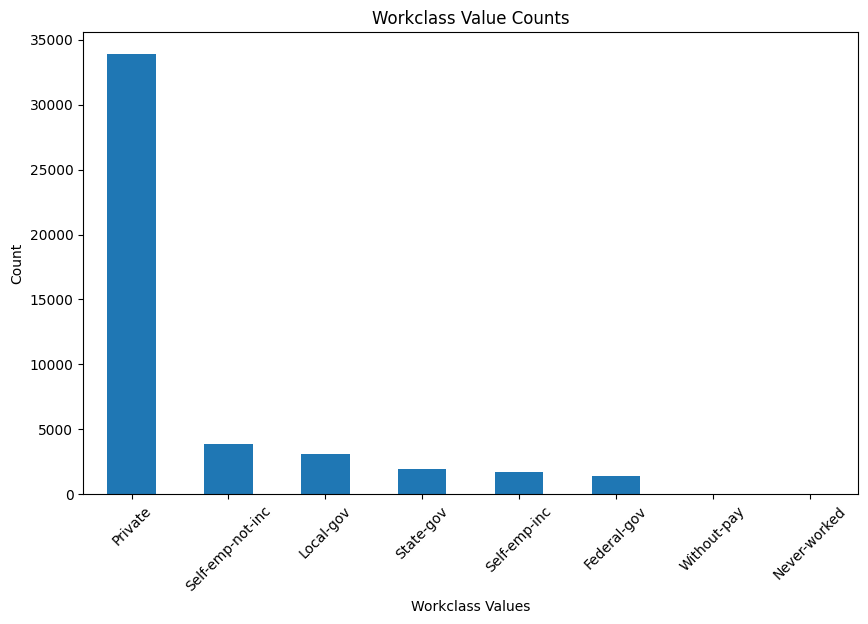

In [170]:
# Plotting the workclass column values and their counts
plt.figure(figsize=(10, 6))
workclass_counts.plot(kind='bar')
plt.title('Workclass Value Counts')
plt.xlabel('Workclass Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

As the above plot we can see Private value has the higher frequencies while comparing with other values. So there we can clearly see there is data unbalance in the "workclass" column (with null values). 

In [171]:
#Filling null values using mode method
workclass_mode_value = data['workclass'].mode()[0]
data['workclass'].fillna(workclass_mode_value, inplace=True)

In [172]:
#Checking null values inside the workclass
workclass_null_values = data["workclass"].isnull().sum()
workclass_null_values

0

#### Considering Occupation column

In [175]:
occupation_counts = data["occupation"].value_counts()
occupation_counts

occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

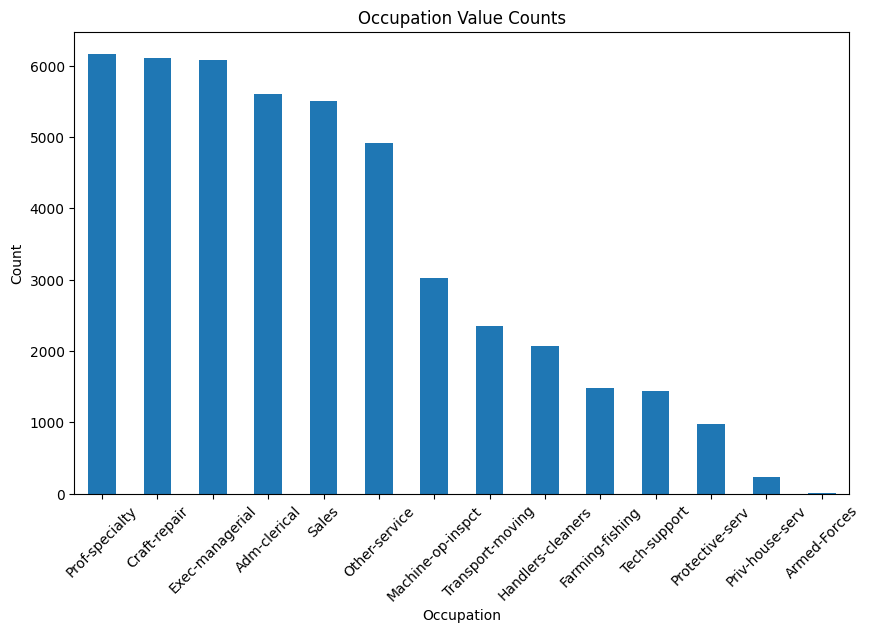

In [176]:
# Plotting
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation Value Counts')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [177]:
#Drop the data that occupation column value is empty and income is less than 50k
data = data.drop(data[(data['occupation'].isna()) & (data['income'] == '<=50K')].index)
#check that data is get removed
data[(data['occupation'].isna()) & (data['income'] == '<=50K')]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [178]:
occupation_mode_values = data['occupation'].mode()[0]
data['occupation'].fillna(occupation_mode_values, inplace=True)

In [179]:
occupation_null_values = data["occupation"].isnull().sum()
occupation_null_values

0

#### Considering Native country column 

In [182]:
native_country_counts = data["native-country"].value_counts()
native_country_counts

native-country
United-States                 40043
Mexico                          873
Philippines                     271
Germany                         182
Puerto-Rico                     164
Canada                          162
El-Salvador                     142
India                           141
Cuba                            130
England                         114
China                           111
South                           102
Jamaica                         101
Italy                            95
Dominican-Republic               92
Japan                            88
Vietnam                          82
Guatemala                        82
Columbia                         78
Poland                           78
Haiti                            66
Portugal                         59
Taiwan                           55
Iran                             55
Nicaragua                        47
Greece                           46
Peru                             45
Ecuador      

In [183]:
#count all the null values count that belongs to native-country column
data["native-country"].isnull().sum()

792

In [184]:
#count missing values for higher income people 
missing_high_income = data[data["income"]==">50K"]["native-country"].isna().sum()
missing_low_income = data[data["income"]=="<=50K"]["native-country"].isna().sum()

In [185]:
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')
print(f'Number of missing data rows (native country) for lower income people: {missing_low_income}')

Number of missing data rows (native country) for higher income people: 215
Number of missing data rows (native country) for lower income people: 577


In [186]:
#Now we filled the missing values by using mode.
data["native-country"].fillna(data["native-country"].mode()[0],inplace=True)

In [187]:
missing_low_income = data[data["income"]==">50K"]["native-country"].isna().sum()
missing_high_income = data[data["income"]=="<=50K"]["native-country"].isna().sum()
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')
print(f'Number of missing data rows (native country) for lower income people: {missing_low_income}')

Number of missing data rows (native country) for higher income people: 0
Number of missing data rows (native country) for lower income people: 0


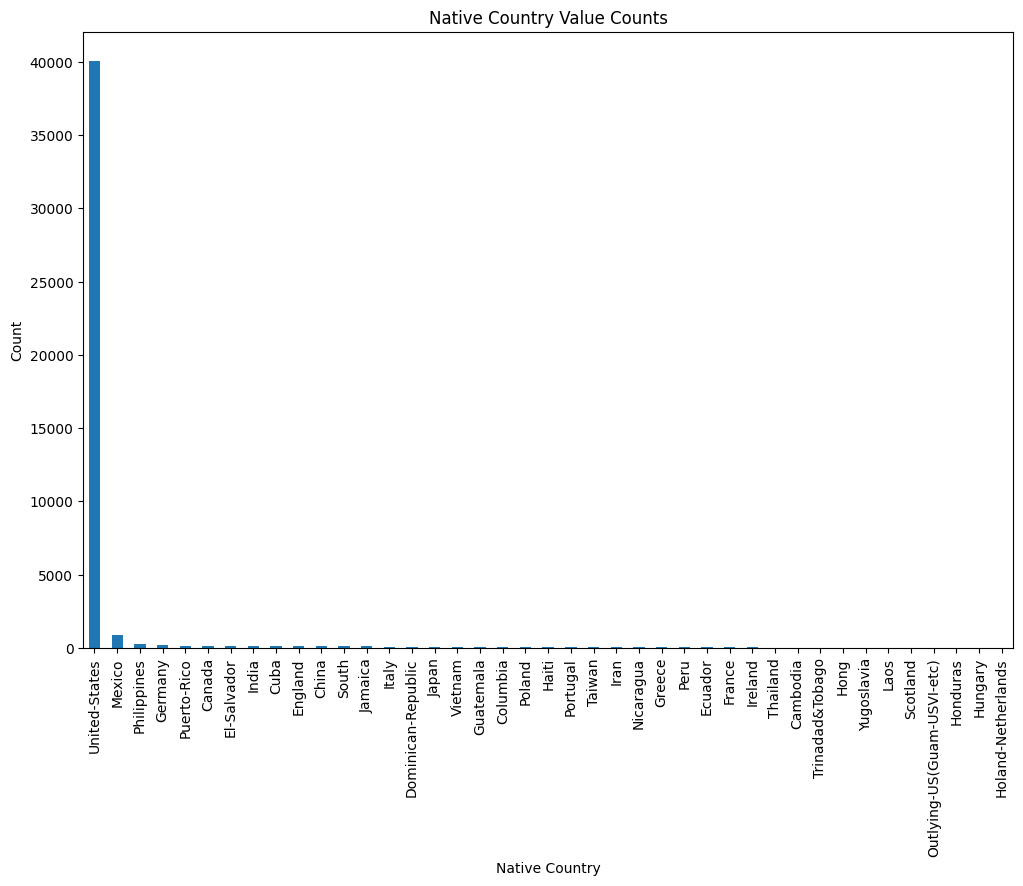

In [188]:
# Plotting
plt.figure(figsize=(12, 8))
native_country_counts.plot(kind='bar')
plt.title('Native Country Value Counts')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

As you can see now there are no missing values in the dataset.

In [190]:
data["native-country"].value_counts()

native-country
United-States                 40835
Mexico                          873
Philippines                     271
Germany                         182
Puerto-Rico                     164
Canada                          162
El-Salvador                     142
India                           141
Cuba                            130
England                         114
China                           111
South                           102
Jamaica                         101
Italy                            95
Dominican-Republic               92
Japan                            88
Vietnam                          82
Guatemala                        82
Columbia                         78
Poland                           78
Haiti                            66
Portugal                         59
Taiwan                           55
Iran                             55
Nicaragua                        47
Greece                           46
Peru                             45
Ecuador      

As you can see here the most of the data is belonging to the United-states country. Therefore, by using this data it will affect the model accuracy. So the best option is remove this column to gain the accuracy of the model 

In [191]:
data.drop(columns=['native-country'], inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


### Capital-Loss and Capital-Gain values fix

In [192]:
# Capital gain values
data['capital-gain'].value_counts()


capital-gain
0        40855
15024      493
7688       400
7298       346
99999      233
         ...  
1639         1
2387         1
22040        1
1731         1
6612         1
Name: count, Length: 121, dtype: int64

In [193]:
data['capital-loss'].value_counts()

capital-loss
0       42500
1902      299
1977      243
1887      228
1485       68
        ...  
3175        1
1870        1
1539        1
1421        1
2163        1
Name: count, Length: 96, dtype: int64

As you can see, there are huge zero values in the capital loss and capital gain columns. It will affect the model accuracy when we train the model. Therefore, the best option is to remove the capital-gain and capital-loss columns. 

In [194]:
data.drop(columns=['capital-loss','capital-gain'], inplace=True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,40,<=50K
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,<=50K


## Outlier Handling

### Age outliers

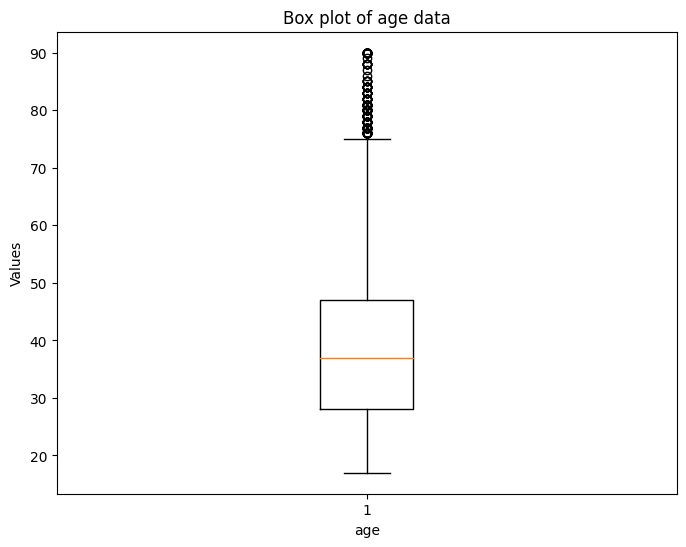

In [195]:
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

In [196]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = data['age'][data['age'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 75


As you can see, there are several outliers above the upperbound. So lets check whether those are really outliers or not and get remove them from dataset.

In [197]:
# Visualizing the Data of people above age 75
above75_high_income = data[(data['age'] >= 75) & (data['income'] == '>50K')]['age'].value_counts()
above75_low_income = data[(data['age'] >= 75) & (data['income'] == '<=50K')]['age'].value_counts()
print(f'people who earn more than 50k and above the age 75:- {above75_high_income.sum()}')
print(f'people who earn below 50k and above the age 75:- {above75_low_income.sum()}')

people who earn more than 50k and above the age 75:- 68
people who earn below 50k and above the age 75:- 250


<Axes: title={'center': 'people who earn less than 50k throughout the ages'}, xlabel='age', ylabel='Count'>

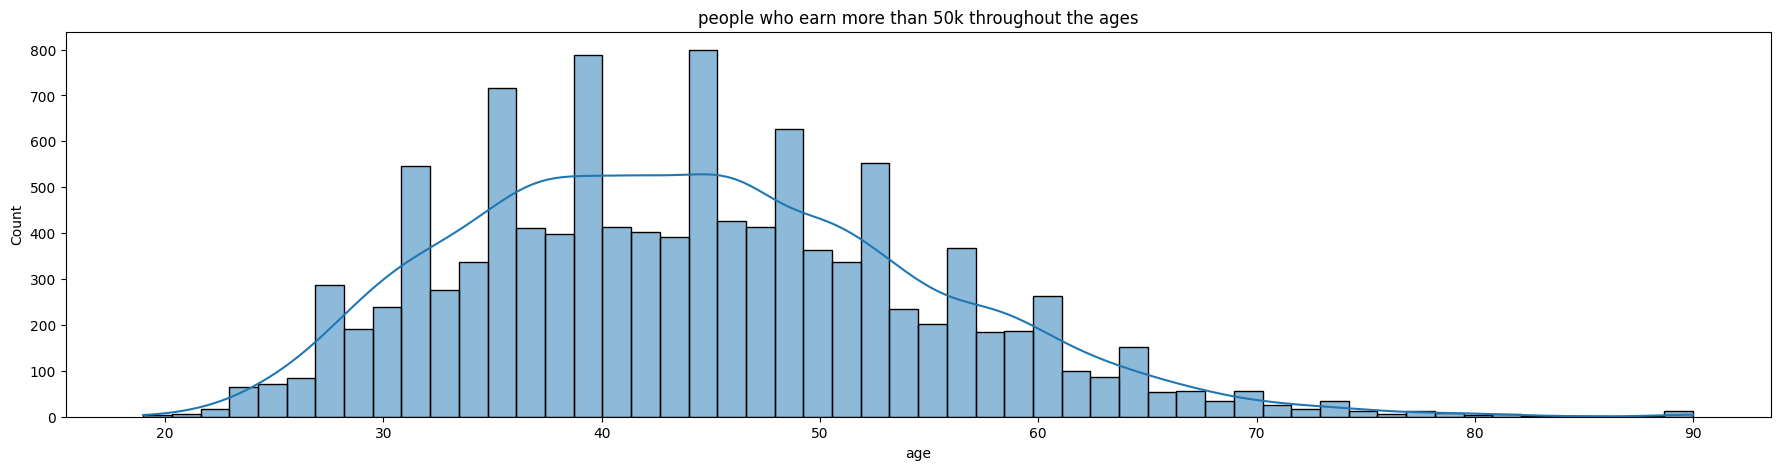

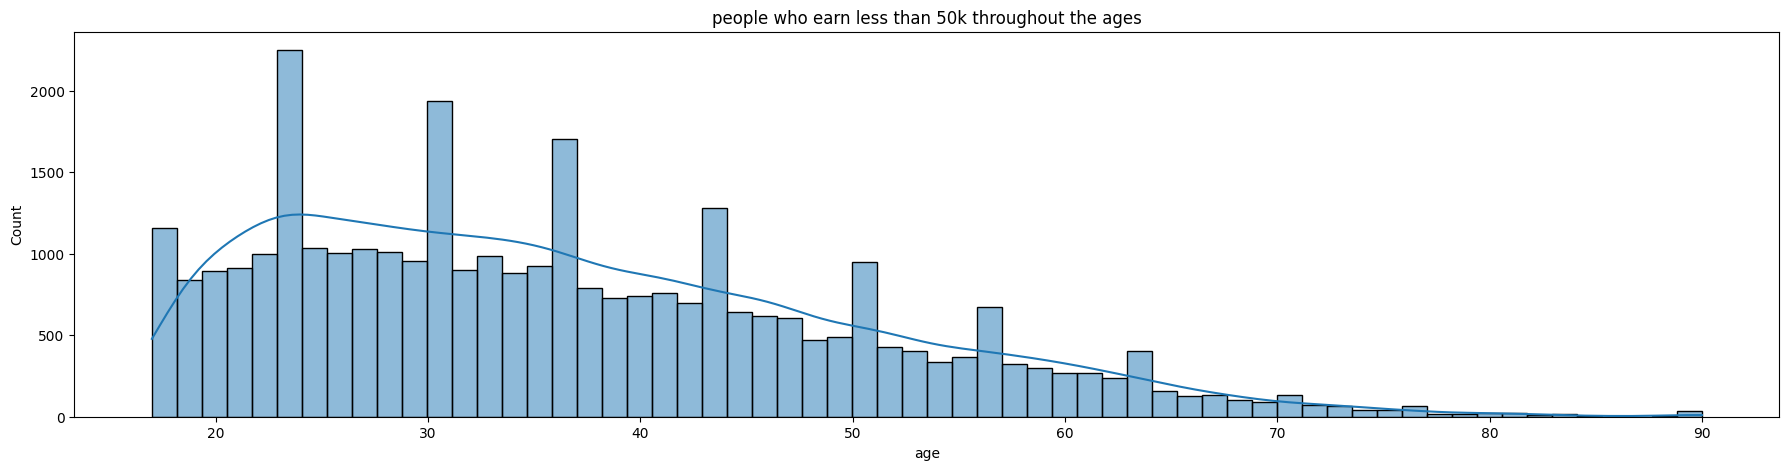

In [198]:
# Let's check how people will earn throughout the aging with KDE (Kernal Density Estimation)
above50k_earn = data[data['income'] == '>50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn more than 50k throughout the ages")
sns.histplot(above50k_earn,kde=True, label=column)

below50k_earn = data[data['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

Analyzing both graphs, we can see that the people who earn more than 50k are somewhat similar to normal distribution. But when it comes to people who earn less than 50k, there is a huge decreasing when it comes to aging. Therefore, we can remove them as outliers.

<Axes: title={'center': 'people who earn more than 50k throughout out the ages'}, xlabel='age', ylabel='Count'>

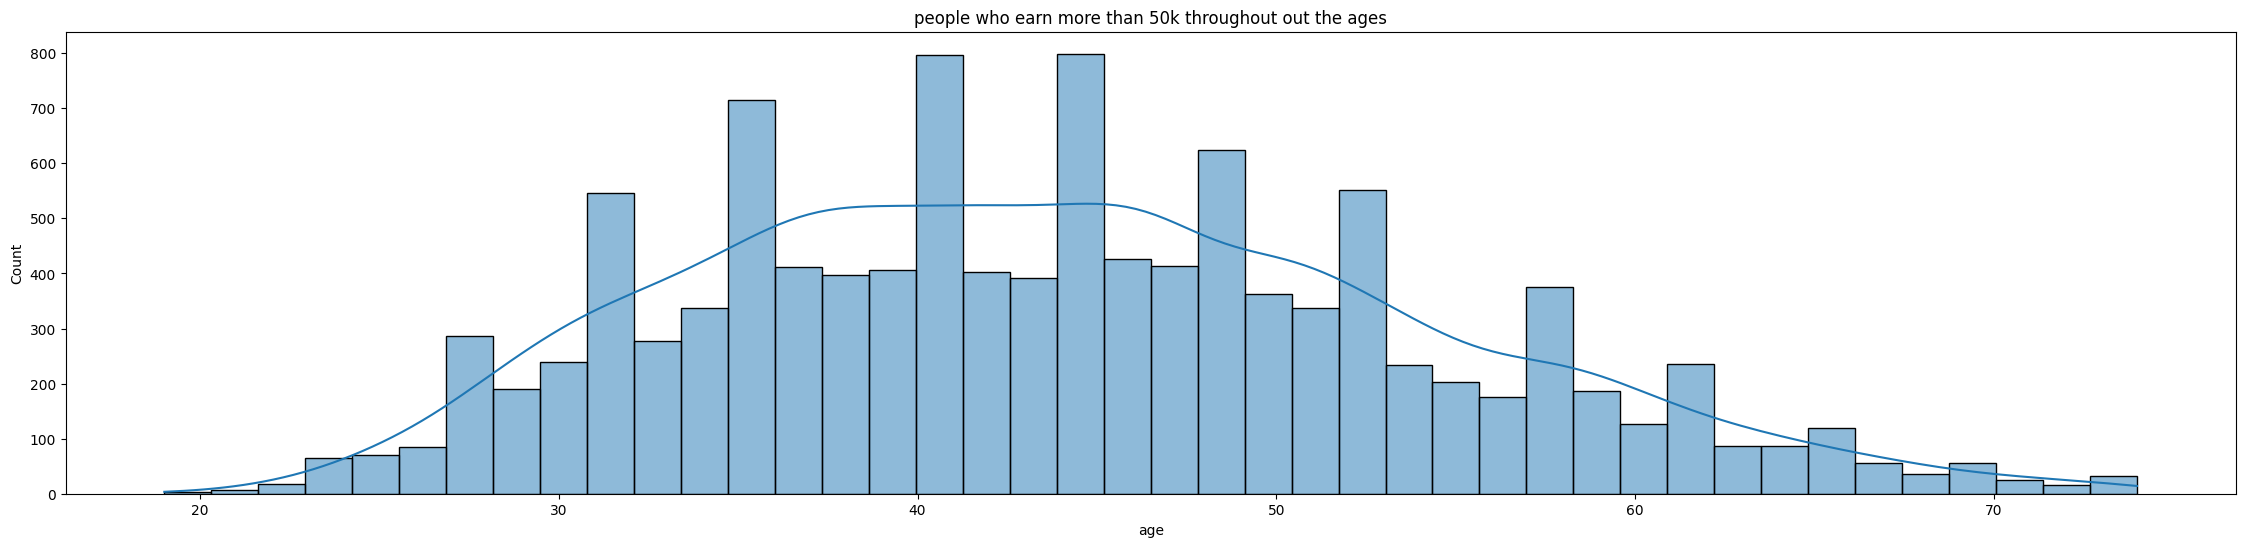

In [199]:
# Let's drop the outliers of the people who earn more than 50K and see the distribution as well as the boxplot
data = data.drop(data[(data['age'] >= 75) & (data['income'] == '>50K')].index)

# Distribution
above50k_earn = data[data['income'] == '>50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn more than 50k throughout out the ages")
sns.histplot(above50k_earn,kde=True, label=column)

<Axes: title={'center': 'people who earn less than 50k throughout the ages'}, xlabel='age', ylabel='Count'>

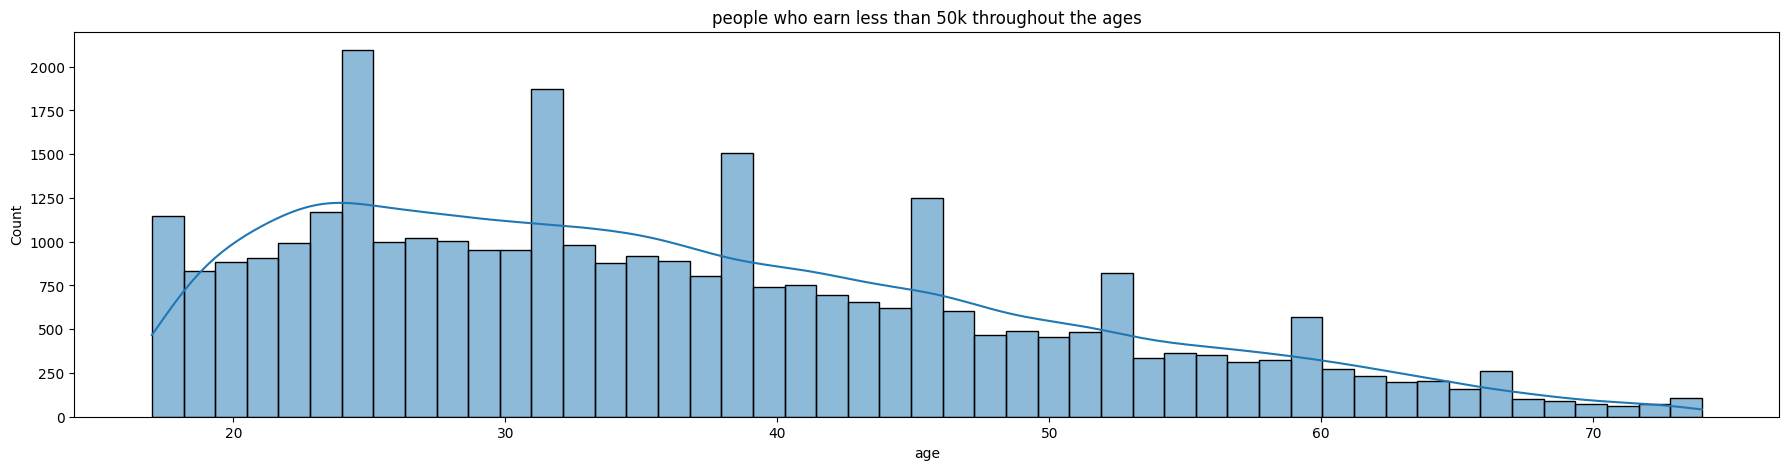

In [200]:
data = data.drop(data[(data['age'] >= 75) & (data['income'] == '<=50K')].index)
below50k_earn = data[data['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

Now we can see that the people who earn more than 50k throughout the ages take a normal distribution which indicates now the age class is balanced.

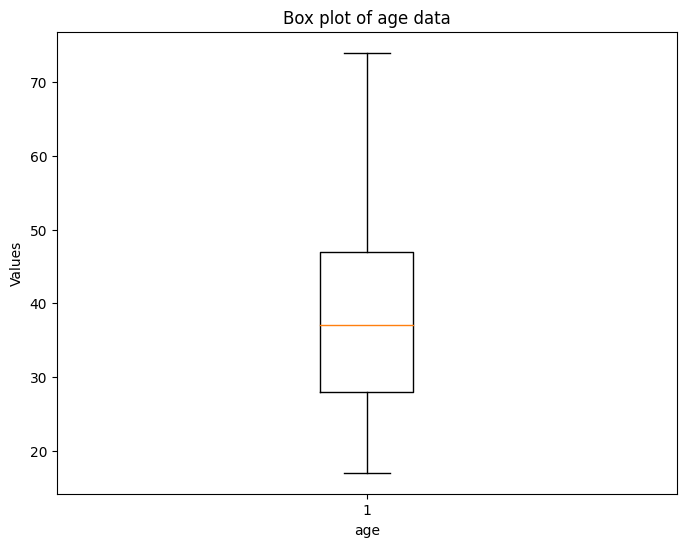

In [201]:
# Boxplot after cleaning the outliers
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

### Final weight outliers

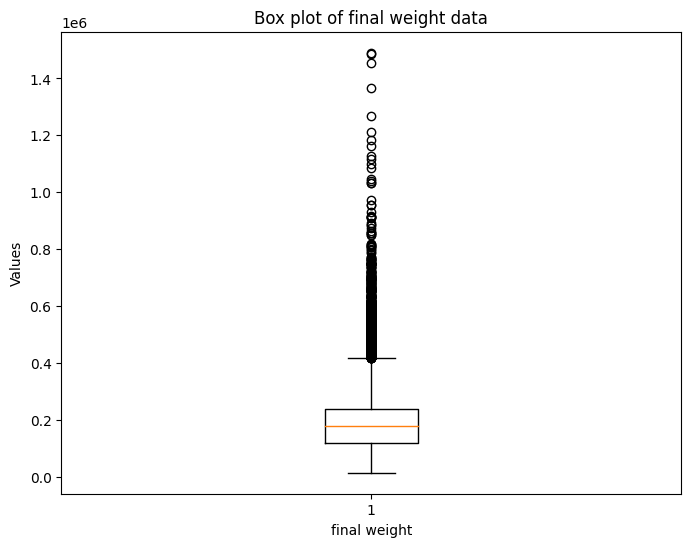

In [202]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

In [121]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = data['fnlwgt'][data['fnlwgt'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

# Number of records upper the bound of the dataset\
fnlwgt_outliers = data[data['fnlwgt'] >= 417419].value_counts().sum()
print(f'number of outliers :- {fnlwgt_outliers}')

Upper bound within the boxplot: 418176
number of outliers :- 1334


In [122]:
# Removing the final weight outliers
adult_dataset = data.drop(data[data['fnlwgt'] >= 417419].index)

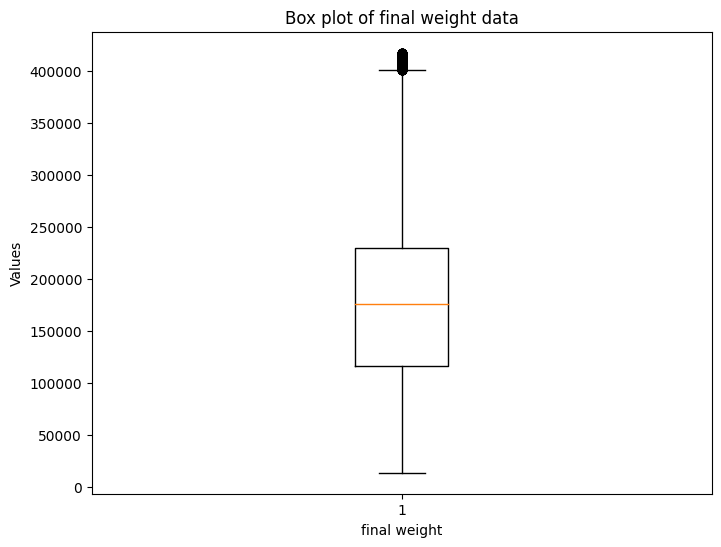

In [123]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

### Working hours per-week outliers

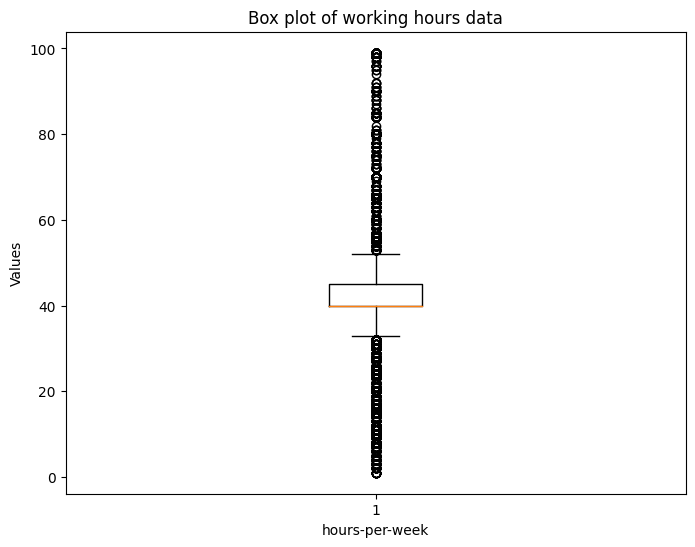

In [124]:
# Create a box plot for working hours feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of working hours data')
plt.xlabel('hours-per-week')
plt.ylabel('Values')
plt.show()

### Education and Education-num fix

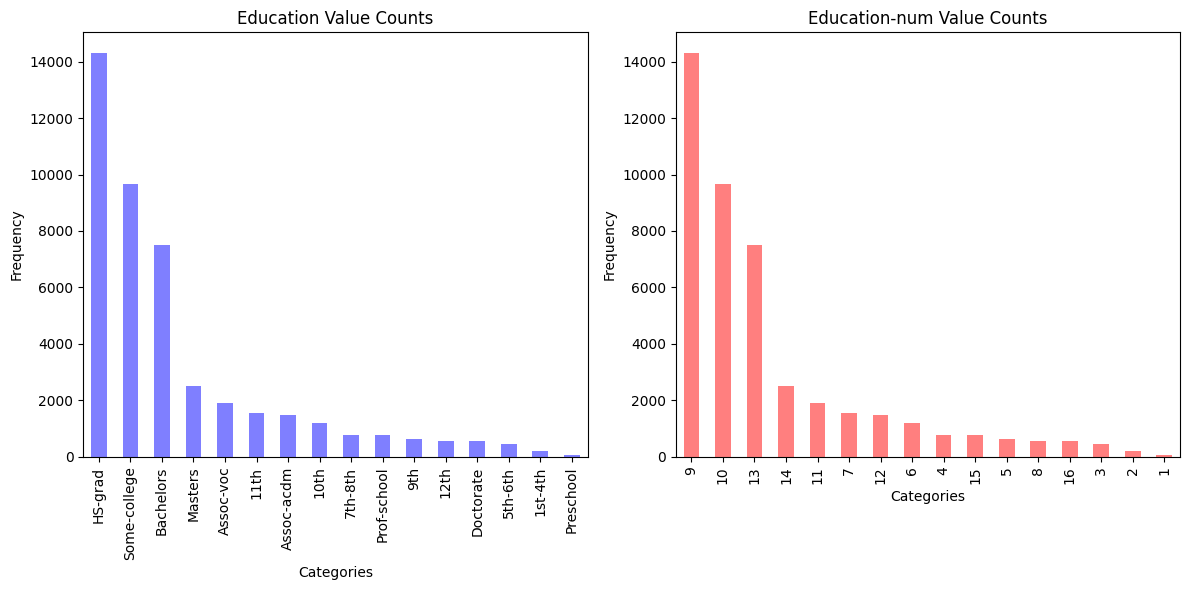

In [205]:
# Calculate value counts for both columns
education_counts = data['education'].value_counts()
education_num_counts = data['education-num'].value_counts()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting 'education' value counts
education_counts.plot(kind='bar', color='b', ax=axs[0], alpha=0.5)
axs[0].set_title('Education Value Counts')
axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Frequency')

# Plotting 'education-num' value counts
education_num_counts.plot(kind='bar', color='r', ax=axs[1], alpha=0.5)
axs[1].set_title('Education-num Value Counts')
axs[1].set_xlabel('Categories')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

As you can see both the columns values ahh same, therefore the best option to gain the model accuraccy is removing one of column. Lets remove the education column.

In [206]:
data.drop(columns=['education'], inplace=True)
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K


### Label Encoder

In [207]:
# Define the categorical columns to be encoded
categorical_columns = ['workclass','marital-status','occupation','relationship','race','sex','income']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

### Save Pre Processed Data

In [221]:
# Saving the dataframe as a csv file for future references.
data.to_csv('dataset/adult_dataset.csv')